
# Project 1: Comprehensive Regression Analysis
### Course: Introduction to Machine Learning

This notebook is designed to guide you through a comprehensive regression analysis using various techniques. You will explore different methods, implement regularization techniques, and evaluate the performance of your models using various metrics and computational time.


## Submission Instructions

Once you are finished, follow these steps:

Make sure you have provided the team name, name of team members with IDs. 

Restart the kernel and re-run this notebook from beginning to end by going to Kernel > Restart Kernel and Run All Cells. If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end. Double check that there is a number next to each code cell and that these numbers are in order. Then, submit your project as follows:

Go to File > Print > Save as PDF. Double check that the entire notebook, from beginning to end, is in this PDF file. Upload the PDF and the notebook to Google Classroom.




### Team Name: **Insight Engineers** 
### Name and ID of Member 1: **Sayan Das** - ``B2430035``
### Name and ID of Member 2: **Raihan Uddin** - ``B2430070``

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
# Add all other libraries you would require
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet, SGDRegressor
import matplotlib.pyplot as plt


## 1. Load the Dataset
**Instruction:** Load the chosen dataset and display its basic information and statistics. You may use any well-known dataset.

In [3]:

# Loading a particular dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/SayanDasDev/ML-College-/main/project_1/data/housing.csv')

# Display the first few rows of the dataset
dataset.head()



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:

# Display basic statistics
dataset.describe().T


,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000



## 2. Data Preprocessing
**Instruction:** Perform any necessary preprocessing steps, including handling missing values, encoding categorical variables, and scaling features if required.


In [5]:

# Checking for missing values
dataset.isnull().sum().to_frame('Missing Values')

,Missing Values
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [6]:

# removing data with missing values
dataset.dropna(inplace=True)
dataset.isnull().sum().to_frame('Missing Values')



,Missing Values
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [7]:
# Encoding the categorical variable 'ocean_proximity' using one-hot encoding
dataset = pd.get_dummies(dataset, columns=['ocean_proximity'])

# Display the first few rows of the encoded dataset
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


In [8]:

# Splitting the dataset into features (X) and target (y)
X = dataset['median_income'].values.reshape(-1,1)
y = dataset['median_house_value'].values


In [9]:
# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:

# Split the data into training and test sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shapes of the resulting datasets:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

Shapes of the resulting datasets:
X_train: (16346, 1), y_train: (16346,)
X_test: (4087, 1), y_test: (4087,)



## 3. Simple Linear Regression
**Instruction:** Implement a simple linear regression model using scikit-learn.


In [11]:

# Define the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate performance metrics [MSE, MAE, R^2]
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")



Mean Squared Error (MSE): 7221011204.235033
Mean Absolute Error (MAE): 63374.551304332555
R^2 Score: 0.47196228574894983


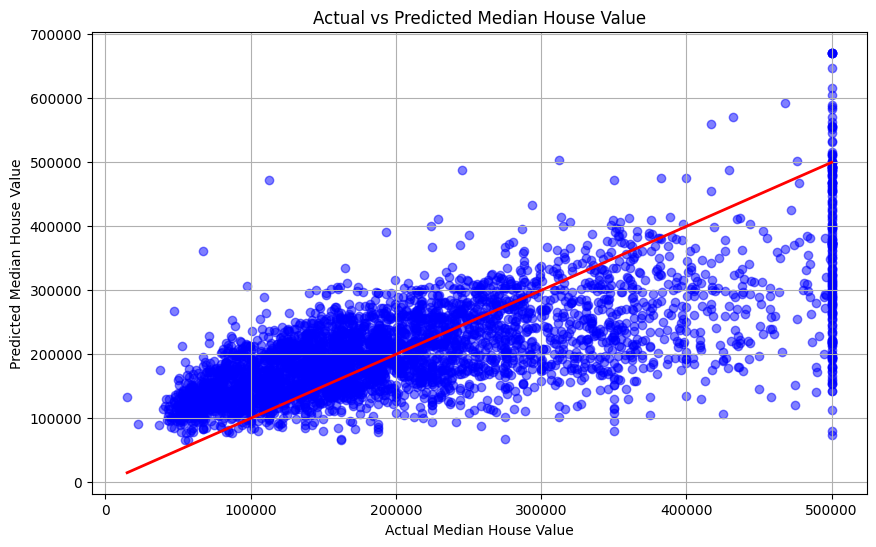

In [12]:
# Scatter plot of the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted Median House Value')
plt.grid(True)
plt.show()


## 4. Polynomial Regression
**Instruction:** Implement polynomial regression for degrees 2, 3, and 4.


In [13]:
def polynomial_regression(degree):
    # Define polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    poly_features = poly.fit_transform(X_scaled)
   
    # Split the transformed data into training and test sets
    X_train_poly, X_test_poly, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)
   
    # Fit the linear model on polynomial features
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
   
    # Predict and evaluate performance
    y_pred_poly = poly_model.predict(X_test_poly)
   
    # Calculate performance metrics for polynomial regression
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    mae_poly = mean_absolute_error(y_test, y_pred_poly)
    r2_poly = r2_score(y_test, y_pred_poly)
   
    # Print the metrics for polynomial regression
    print(f"Polynomial Regression (degree {degree}) Results:")
    print(f"MSE: {mse_poly}, MAE: {mae_poly}, R2: {r2_poly}")
    print("")
    
for degree in [2, 3, 4]:
    polynomial_regression(degree)

Polynomial Regression (degree 2) Results:
MSE: 6931151071.238994, MAE: 62458.500274909886, R2: 0.4800700473361835

Polynomial Regression (degree 3) Results:
MSE: 6862264696.007738, MAE: 61809.94744838237, R2: 0.4852374559592315

Polynomial Regression (degree 4) Results:
MSE: 6861339906.019718, MAE: 61828.67272721735, R2: 0.48530682769990674




## 5. Gradient Descent Methods
**Instruction:** Implement batch, stochastic, and mini-batch gradient descent for linear regression.


In [14]:

# Example function for batch gradient descent. 
# Return theta and history (a list that stores cost for each epoch)
def batch_gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros(n)
    history = []
    
    for _ in range(epochs):
        h = X.dot(theta)
        gradient = (1/m) * X.T.dot(h - y)
        theta -= learning_rate * gradient
        cost = (1/(2*m)) * np.sum((h - y)**2)
        history.append(cost)  
    return theta, history
  
def stochastic_gradient_descent(X, y, learning_rate=0.001, epochs=50):
    m = len(y)
    theta = np.zeros(X.shape[1])
    history = []

    for epoch in range(epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = xi.T.dot(xi.dot(theta) - yi)
            theta = theta - learning_rate * gradients
        
        cost = 1/(2*m) * np.sum((X.dot(theta) - y) ** 2)
        history.append(cost)
    
    return theta, history

def mini_batch_gradient_descent(X, y, learning_rate=0.001, epochs=50, batch_size=32):
    m = len(y)
    theta = np.zeros(X.shape[1])
    history = []

    for epoch in range(epochs):
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        
        for i in range(0, m, batch_size):
            xi = X_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            gradients = 1/len(xi) * xi.T.dot(xi.dot(theta) - yi)
            theta = theta - learning_rate * gradients
        
        cost = 1/(2*m) * np.sum((X.dot(theta) - y) ** 2)
        history.append(cost)
    
    return theta, history

# Run them and output the performance
theta_bgd, history_bgd = batch_gradient_descent(X_train, y_train)
print(f"Batch Gradient Descent Final Cost: {history_bgd[-1]}")
print("")
theta_sgd, history_sgd = stochastic_gradient_descent(X_train, y_train)
print(f"Stochastic Gradient Descent Final Cost: {history_sgd[-1]}")
print("")
theta_mini_batch, history_mini_batch = mini_batch_gradient_descent(X_train, y_train)
print(f"Mini-Batch Gradient Descent Final Cost: {history_mini_batch[-1]}")


Batch Gradient Descent Final Cost: 3675837609.324165

Stochastic Gradient Descent Final Cost: 3689568988.162325

Mini-Batch Gradient Descent Final Cost: 3676855558.6366487



## 6. Regularization Techniques (Ridge,  Lasso, Elastic Net Regression and Early Stopping)
**Instruction:** Implement Ridge, Lasso regression, Elastic Net Regression, and Early Stopping using scikit-learn and compare the results.


In [15]:

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Elastic Net Regression
elastic_net_model = ElasticNet(alpha=1.0)
elastic_net_model.fit(X_train, y_train)
y_pred_elastic_net = elastic_net_model.predict(X_test)

# Early Stopping


# Calculate performance metrics for each of these
ridge_matrices = mean_squared_error(y_test, y_pred_ridge)
lasso_matrices = mean_squared_error(y_test, y_pred_lasso)
elastic_net_matrices = mean_squared_error(y_test, y_pred_elastic_net)

# Print the performance metrics
print("Ridge Regression Results:")
print(f"MSE: {ridge_matrices}")
print("")

print("Lasso Regression Results:")
print(f"MSE: {lasso_matrices}")
print("")

print("Elastic Net Regression Results:")
print(f"MSE: {elastic_net_matrices}")
print("")



Ridge Regression Results:
MSE: 7221013383.742889

Lasso Regression Results:
MSE: 7221012057.097608

Elastic Net Regression Results:
MSE: 7330673583.178392




## 7. Normal Equation
**Instruction:** Implement the normal equation method for linear regression.


In [16]:
# Define Normal equation. Inputs: X and y, Output: theta
def normal_equation(X, y):
    # Put your code and output accordingly
    return

# Use the normal equation to find theta
theta_ne = normal_equation(X_train, y_train)

# Predict using the normal equation
y_pred_ne = 

# Calculate and print the performance metrics




SyntaxError: invalid syntax (3074200229.py, line 10)

In [ ]:
def normal_equation(X, y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

X_train_ne = np.c_[np.ones((X_train.shape[0], 1)), X_train]
theta_ne = normal_equation(X_train_ne, y_train)
X_test_ne = np.c_[np.ones((X_test.shape[0], 1)), X_test]
y_pred_ne = X_test_ne.dot(theta_ne)

print("Normal Equation Results:")
print(f"MSE: {mean_squared_error(y_test, y_pred_ne)}")

## 8. Implement linear Regression using SVD


In [ ]:
# Define SVD equation. Inputs: X and y, Output: theta
def svd_equation(X, y):
    # Put your code and output accordingly
    return

# Use the svd equation to find theta

# Predict using the svd equation

# Calculate the performance metrics


# Print the performance metrics



In [ ]:
def svd_regression(X, y):
    U, s, Vt = np.linalg.svd(X, full_matrices=False)
    S_inv = np.diag(1 / s)
    theta = Vt.T.dot(S_inv).dot(U.T).dot(y)
    return theta

X_train_svd = np.c_[np.ones((X_train.shape[0], 1)), X_train]
theta_svd = svd_regression(X_train_svd, y_train)
X_test_svd = np.c_[np.ones((X_test.shape[0], 1)), X_test]
y_pred_svd = X_test_svd.dot(theta_svd)

print("SVD Regression Results:")
print(f"MSE: {mean_squared_error(y_test, y_pred_svd)}")


## 9. Performance Metrics and Computational Analysis
**Instruction:** Compare the performance and computational time of all models implemented.


In [ ]:

# Example: Timing the training process
start_time = time.time()
linear_model.fit(X_train, y_train)
end_time = time.time()
print(f'Training Time (Linear Regression): {end_time - start_time} seconds')

# Plot performance comparison (students to fill in the details)
# Students should create plots comparing the performance metrics (MSE, MAE, R2) and computational time for each model.


In [ ]:
methods = ['Linear', 'Polynomial', 'BGD', 'Ridge', 'Normal Equation', 'SVD']
times = []
mse_scores = []

for method in methods:
    start_time = time.time()
    # Run the corresponding method here
    svd_regression(X_train_svd, y_train)
    end_time = time.time()
    times.append(end_time - start_time)
    # Calculate and store MSE for each method

# Create a bar plot comparing computational times
plt.figure(figsize=(10, 6))
plt.bar(methods, times)
plt.title('Computational Time Comparison')
plt.xlabel('Method')
plt.ylabel('Time (seconds)')
plt.show()


## 10. Conclusion
**Instruction:** Summarize the findings from the analysis, including which models performed best in terms of accuracy and computational efficiency.
